## Industrial Copper Modeling

#### Importing libraries

In [151]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix 
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import pickle
import pandas as pd
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scipy.stats import skew, boxcox
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Data Collection

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/Vengatesan-K/Industrial-Copper-Modeling/main/Dataset/copper.csv",low_memory=False)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [46]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [47]:
df.shape

(181673, 14)

In [48]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"Unique values in '{column}': {unique_count}")

Unique values in 'id': 181672
Unique values in 'item_date': 253
Unique values in 'quantity tons': 181673
Unique values in 'customer': 1170
Unique values in 'country': 18
Unique values in 'status': 10
Unique values in 'item type': 7
Unique values in 'application': 31
Unique values in 'thickness': 595
Unique values in 'width': 1386
Unique values in 'material_ref': 16564
Unique values in 'product_ref': 33
Unique values in 'delivery date': 29
Unique values in 'selling_price': 9796


### Data type conversion

In [49]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [50]:
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

In [51]:
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')

In [52]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

### Data Cleaning

In [53]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

df['material_ref'] = df['material_ref'].astype('category')
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             181671 non-null  object  
 1   item_date      181670 non-null  object  
 2   quantity tons  181672 non-null  float64 
 3   customer       181672 non-null  float64 
 4   country        181645 non-null  float64 
 5   status         181671 non-null  object  
 6   item type      181673 non-null  object  
 7   application    181649 non-null  float64 
 8   thickness      181672 non-null  float64 
 9   width          181673 non-null  float64 
 10  material_ref   103754 non-null  category
 11  product_ref    181673 non-null  int64   
 12  delivery date  181670 non-null  object  
 13  selling_price  181672 non-null  float64 
dtypes: category(1), float64(7), int64(1), object(5)
memory usage: 19.0+ MB


In [55]:
missing_values = df.isna().sum()

print("Missing Values:")
print(missing_values)

missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Value Percentage:")
print(missing_percentage)

Missing Values:
id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

Missing Value Percentage:
id                0.001101
item_date         0.001651
quantity tons     0.000550
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.001651
selling_price     0.000550
dtype: float64


In [56]:
df['material_ref'].fillna(df['material_ref'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['application'].fillna(df['application'].mode()[0], inplace=True)
df.dropna(inplace=True)

<Axes: >

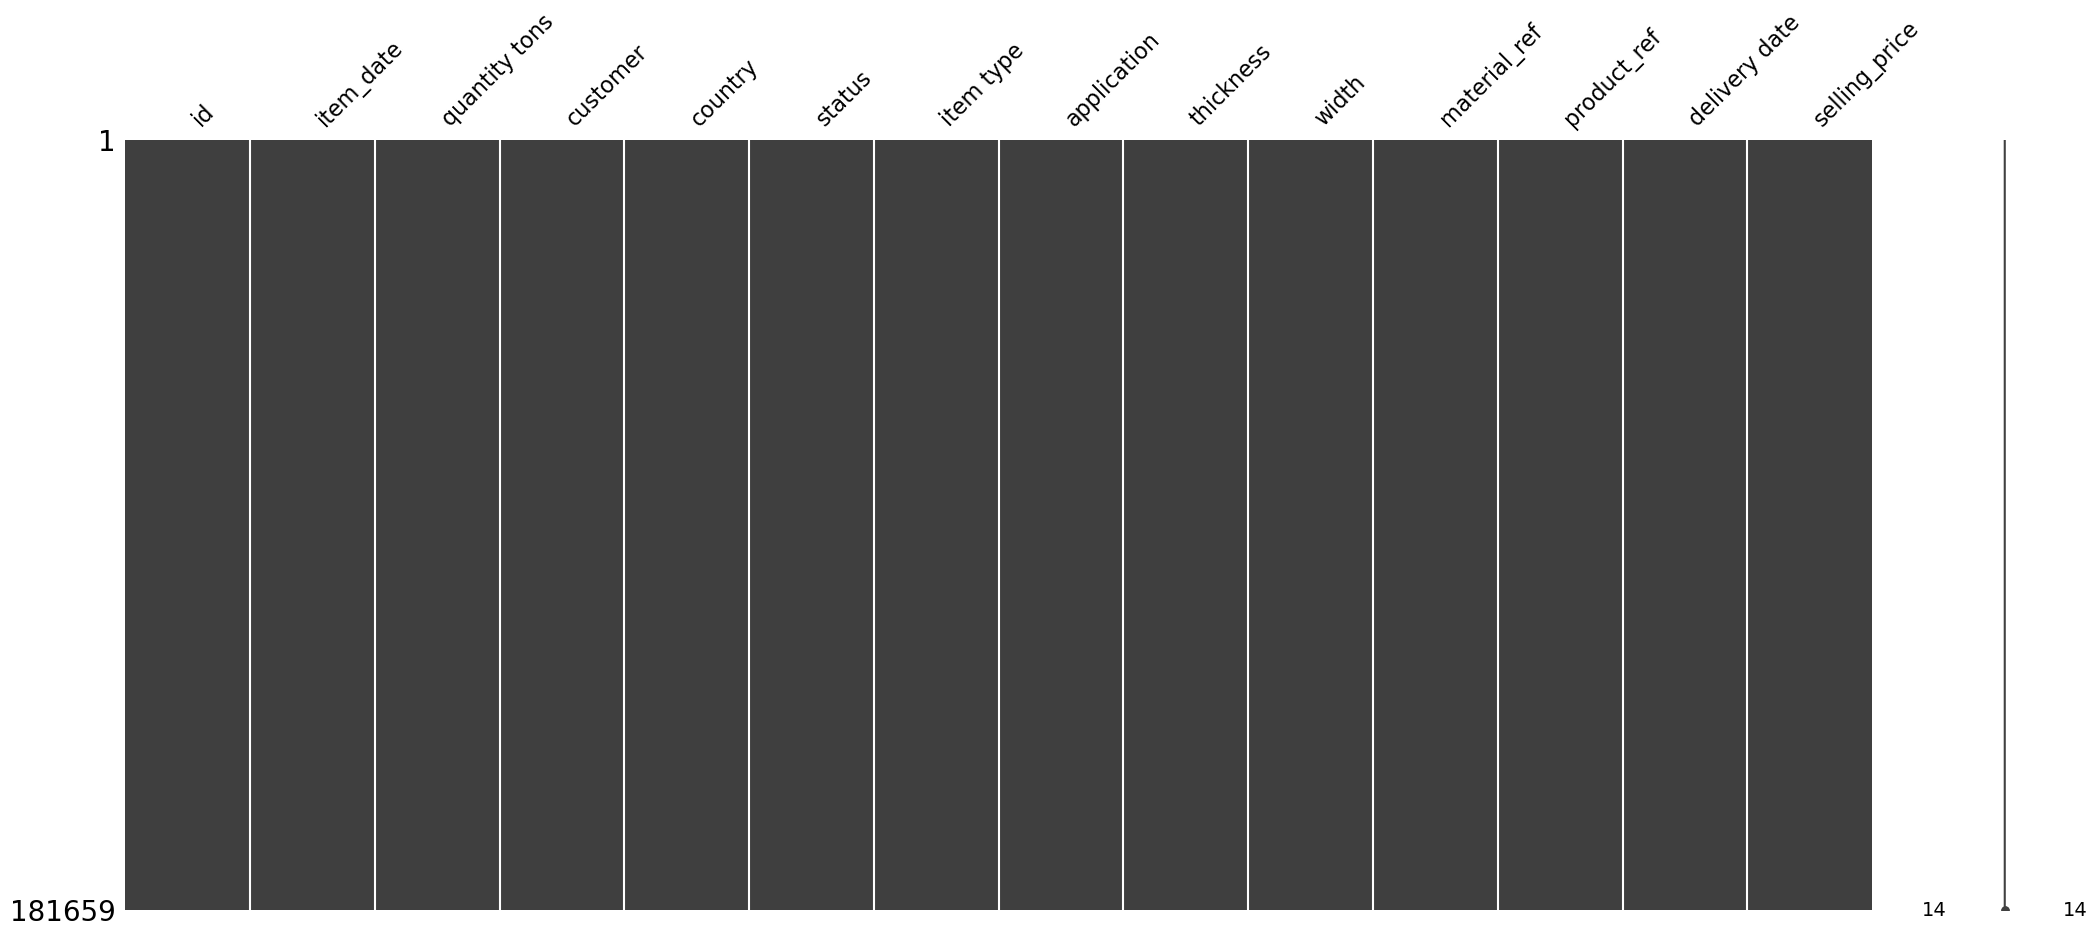

In [57]:
msno.matrix(df)

In [58]:
missing_values = df.isna().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [60]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


### Visualizing outliers and skewness

In [61]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816590e+05,1.816590e+05,181659.000000,181659.000000,181659.000000,181659.000000,1.816590e+05,1.816590e+05
mean,5.875342e+03,3.051223e+07,44.898304,25.614008,2.564916,1295.293759,4.739769e+08,1.918111e+03
std,2.349165e+06,2.433469e+07,24.405883,17.753645,6.572542,261.634772,7.175154e+08,3.318075e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096981e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036411e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.715974e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [62]:
df.shape

(181659, 14)

In [65]:
def check_skewness(df, col_name):
    col = df[col_name]
    mean, median, mode = col.mean(), col.median(), col.mode().iloc[0]
    std_dev = np.std(col)

    skewness = np.sum((col - mean) ** 3) / ((len(col) - 1) * std_dev ** 3)

    print(f'Skewness of {col_name}: {skewness:.2f}')
    print(f'Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}')

    if mean > median > mode:
        print(f'{col_name}: Positive skew')
    elif mean < median < mode:
        print(f'{col_name}: Negative skew')
    else:
        print(f'{col_name}: Normally distributed')

    print("--------*---------")

check_skewness(df, 'quantity tons')
check_skewness(df, 'customer')
check_skewness(df, 'application')
check_skewness(df, 'thickness')
check_skewness(df, 'width')
check_skewness(df, 'selling_price')
check_skewness(df, 'product_ref')
check_skewness(df, 'country')

Skewness of quantity tons: 424.67
Mean: 5875.34, Median: 30.36, Mode: -2000.00
quantity tons: Positive skew
--------*---------
Skewness of customer: 86.98
Mean: 30512227.35, Median: 30205242.00, Mode: 30157111.00
customer: Positive skew
--------*---------
Skewness of application: 0.72
Mean: 25.61, Median: 15.00, Mode: 10.00
application: Positive skew
--------*---------
Skewness of thickness: 303.44
Mean: 2.56, Median: 1.50, Mode: 2.00
thickness: Normally distributed
--------*---------
Skewness of width: 0.37
Mean: 1295.29, Median: 1250.00, Mode: 1250.00
width: Normally distributed
--------*---------
Skewness of selling_price: 301.38
Mean: 1918.11, Median: 812.00, Mode: 832.00
selling_price: Normally distributed
--------*---------
Skewness of product_ref: 1.02
Mean: 473976884.24, Median: 640665.00, Mode: 611993.00
product_ref: Positive skew
--------*---------
Skewness of country: 0.75
Mean: 44.90, Median: 30.00, Mode: 78.00
country: Normally distributed
--------*---------


In [66]:
def check_skewness(col):
  col_mean=df[col].mean()
  col_median=df[col].median()
  col_mode=df[col].mode()[0]
  col_std_dev=np.std(df[col])

  skewness = np.sum((df[col] - col_mean)**3) / ((len(df[col])-1) * col_std_dev**3)
  print('skewness: ',skewness)

  print(col_mean,col_median,col_mode)
  if col_mean > col_median > col_mode:
    print(f'skewness of {col}: positive')
    print("=============================")
  elif col_mean < col_median < col_mode:
    print(f'skewness of {col}: Negative')
    print("=============================")
  elif col_mean == col_median  == col_mode:
    print(f'{col}: Normally distributed')
    print("=============================")
  else:
    print(f'{col}: Normally distributed')
    print("=============================")



print(check_skewness('product_ref'))
print(check_skewness('quantity tons'))
print(check_skewness('country'))
print(check_skewness('thickness'))
print(check_skewness('width'))
print(check_skewness('selling_price'))

skewness:  1.0151853903830612
473976884.24370384 640665.0 611993
skewness of product_ref: positive
None
skewness:  424.67328357917347
5875.341729344934 30.36411101 -2000.0
skewness of quantity tons: positive
None
skewness:  0.7530764417910335
44.898303965121464 30.0 78.0
country: Normally distributed
None
skewness:  303.43697828530793
2.5649159744356176 1.5 2.0
thickness: Normally distributed
None
skewness:  0.37458433877131253
1295.2937590210229 1250.0 1250.0
width: Normally distributed
None
skewness:  301.3756452682015
1918.1114577312437 812.0 832.0
selling_price: Normally distributed
None


In [67]:
df_co=df.copy()

In [68]:
df_co

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


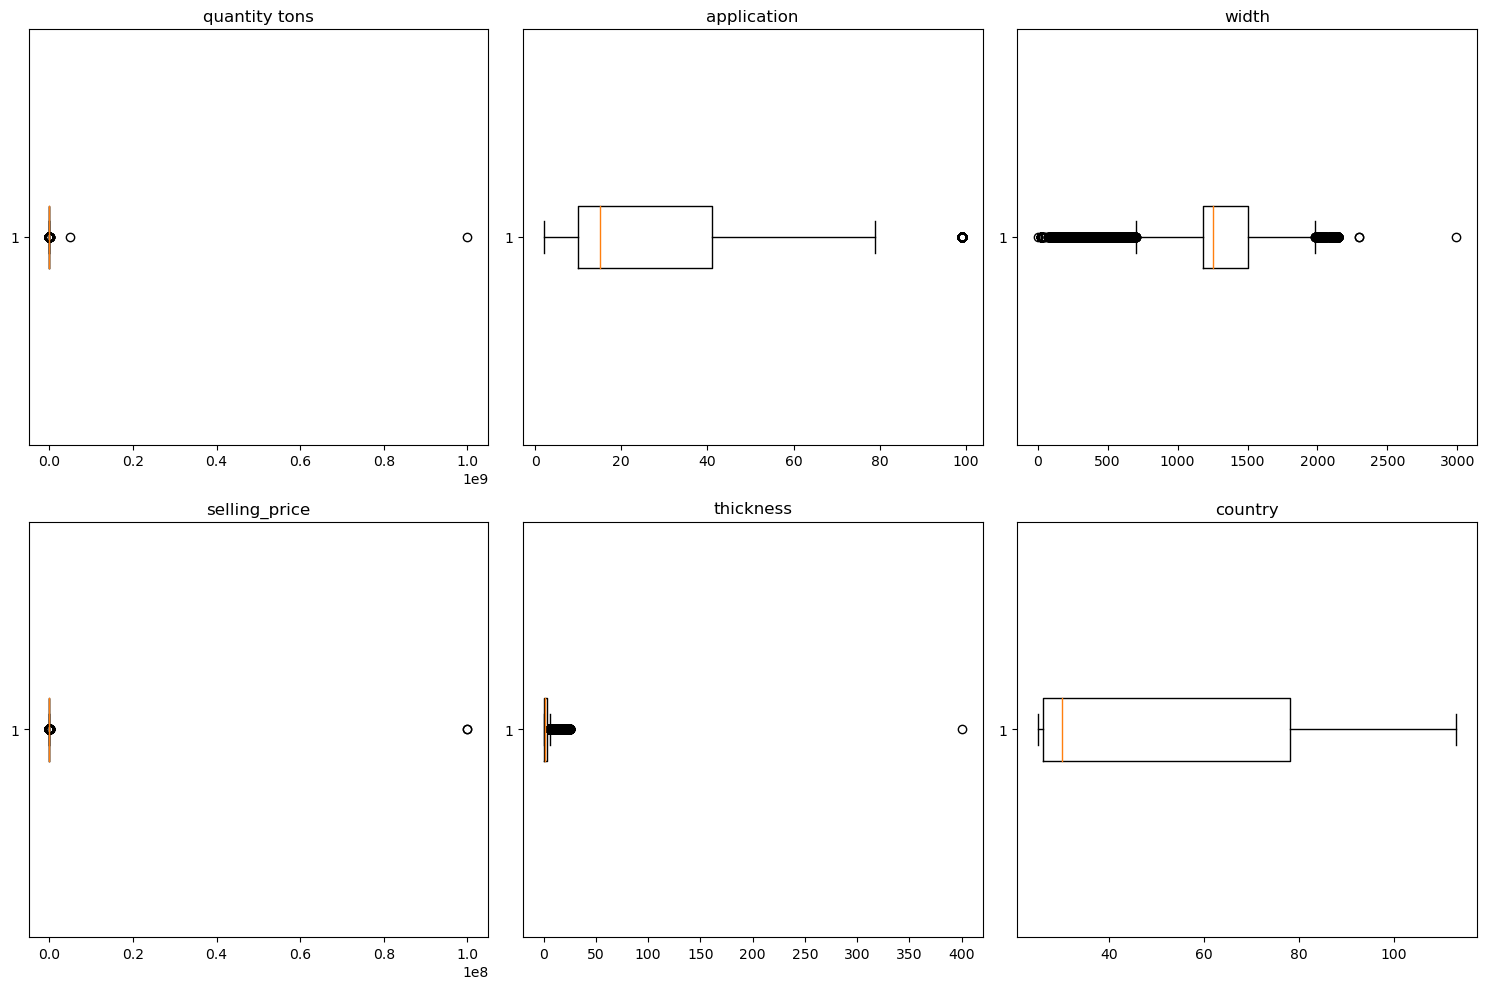

In [81]:
columns_to_plot = ['quantity tons', 'application', 'width', 'selling_price', 'thickness', 'country']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(df_co[column], vert=False)
    axes[i].set_title(column)  

# Remove any empty subplots if the number of columns is less than 6
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [82]:
Q1 = df_co['quantity tons'].quantile(0.25)
Q3 = df_co['quantity tons'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_co['quantity tons'] = df_co['quantity tons'].clip(lower=lower_fence, upper=upper_fence)

In [83]:
Q1 = df_co['application'].quantile(0.25)
Q3 = df_co['application'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_co['application'] = df_co['application'].clip(lower=lower_fence, upper=upper_fence)

In [84]:
Q1 = df_co['thickness'].quantile(0.25)
Q3 = df_co['thickness'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_co['thickness'] = df_co['thickness'].clip(lower=lower_fence, upper=upper_fence)

In [85]:
Q1 = df_co['width'].quantile(0.25)
Q3 = df_co['width'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_co['width'] = df_co['width'].clip(lower=lower_fence, upper=upper_fence)

In [86]:
Q1 = df_co['selling_price'].quantile(0.25)
Q3 = df_co['selling_price'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_co['selling_price'] = df_co['selling_price'].clip(lower=lower_fence, upper=upper_fence)

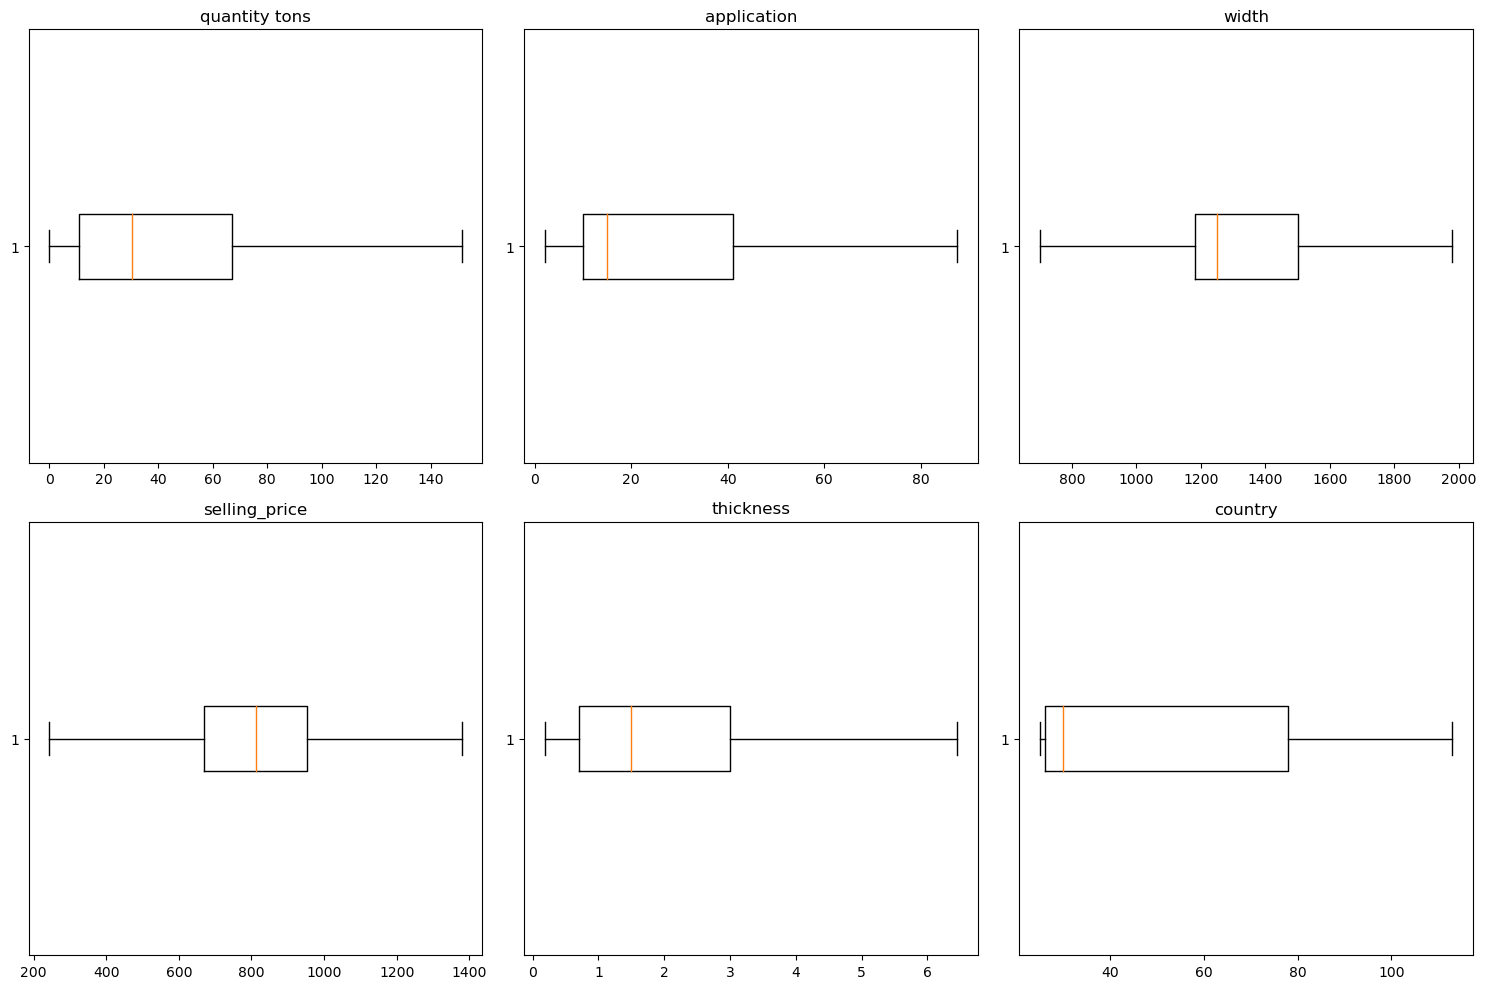

In [87]:
columns_to_plot = ['quantity tons', 'application', 'width', 'selling_price', 'thickness', 'country']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(df_co[column], vert=False)
    axes[i].set_title(column)  

# Remove any empty subplots if the number of columns is less than 6
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

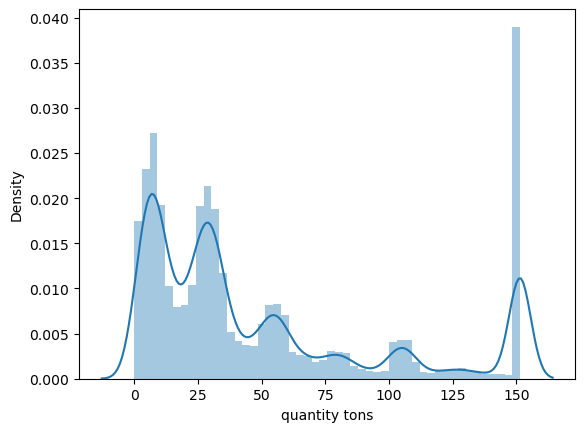

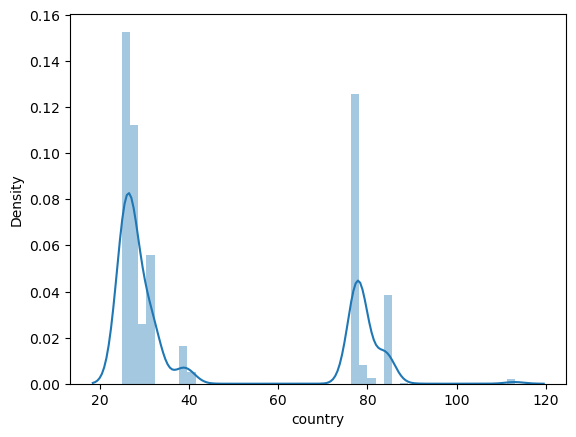

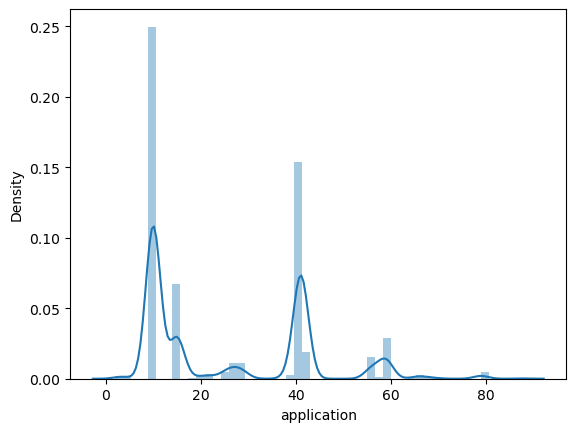

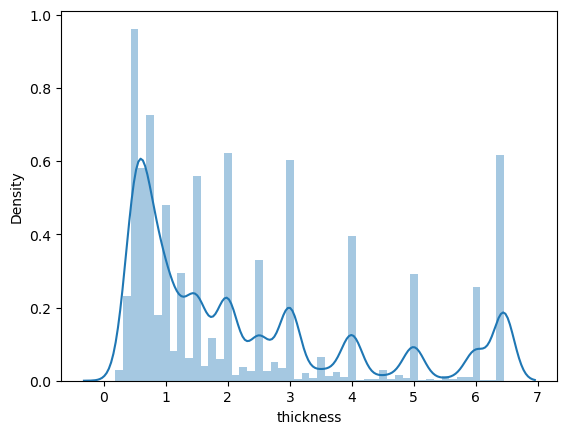

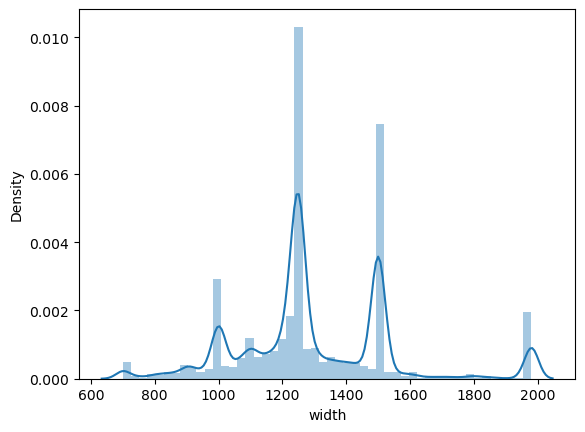

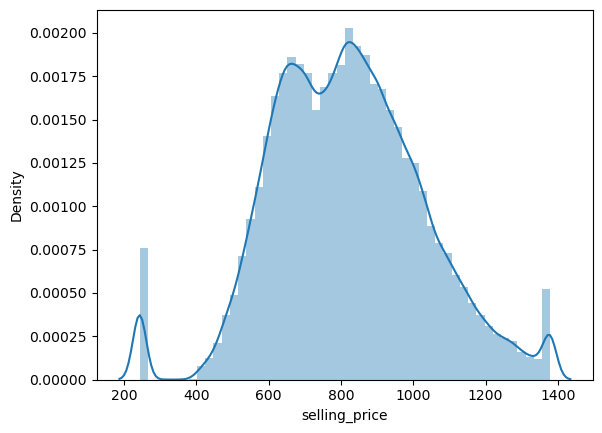

In [88]:
df_co['quantity tons']   # skewed
df_co['country']
df_co['application']
df_co['thickness']       # skewed
df_co['width']           
df_co['selling_price']   # skewed

sns.distplot(df_co['quantity tons'])
plt.show()
sns.distplot(df_co['country'])
plt.show()
sns.distplot(df_co['application'])
plt.show()
sns.distplot(df_co['thickness'])
plt.show()
sns.distplot(df_co['width'])
plt.show()
sns.distplot(df_co['selling_price'])
plt.show()

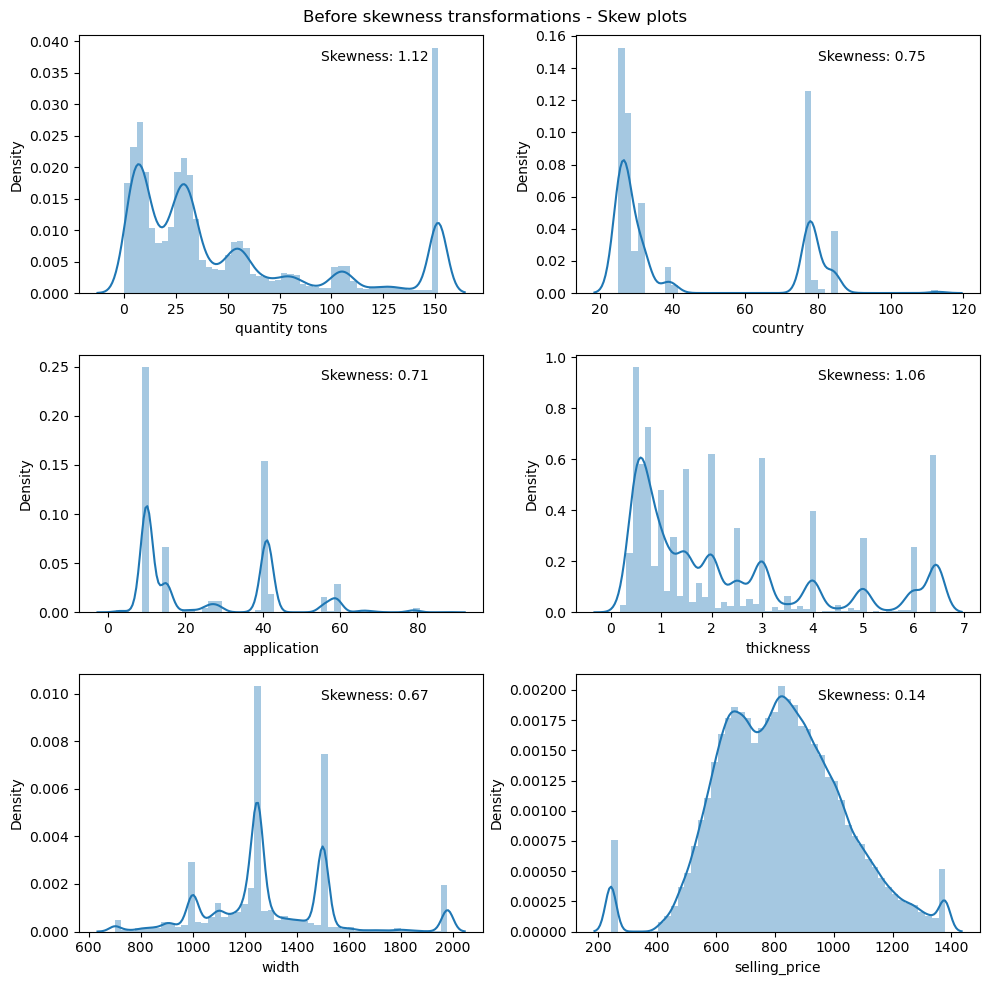

In [89]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(df_co['quantity tons'])
skew_value = np.round(df_co['quantity tons'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,2)
sns.distplot(df_co['country'])
skew_value = np.round(df_co['country'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,3)
sns.distplot(df_co['application'])
skew_value = np.round(df_co['application'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,4)
sns.distplot(df_co['thickness'])
skew_value = np.round(df_co['thickness'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,5)
sns.distplot(df_co['width'])
skew_value = np.round(df_co['width'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,6)
sns.distplot(df_co['selling_price'])
skew_value = np.round(df_co['selling_price'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=10)
plt.suptitle('Before skewness transformations - Skew plots')
plt.tight_layout()
plt.show()

### Skewness handling / transformation

In [90]:
import numpy as np
mask1 = df_co['selling_price'] <= 0
print(mask1.sum())
df_co.loc[mask1, 'selling_price'] = np.nan

mask1 = df_co['quantity tons'] <= 0
print(mask1.sum())
df_co.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_co['thickness'] <= 0
print(mask1.sum())

0
0
0


In [91]:
df_co.isnull().sum()

id                          0
item_date                   0
quantity tons               0
customer                    0
country                     0
status                      0
item type                   0
application                 0
thickness                   0
width                       0
material_ref                0
product_ref                 0
delivery date               0
selling_price               0
selling_price_exp           0
selling_price_log           0
selling_price_reciprocal    0
selling_price_boxcox        0
dtype: int64

<Axes: >

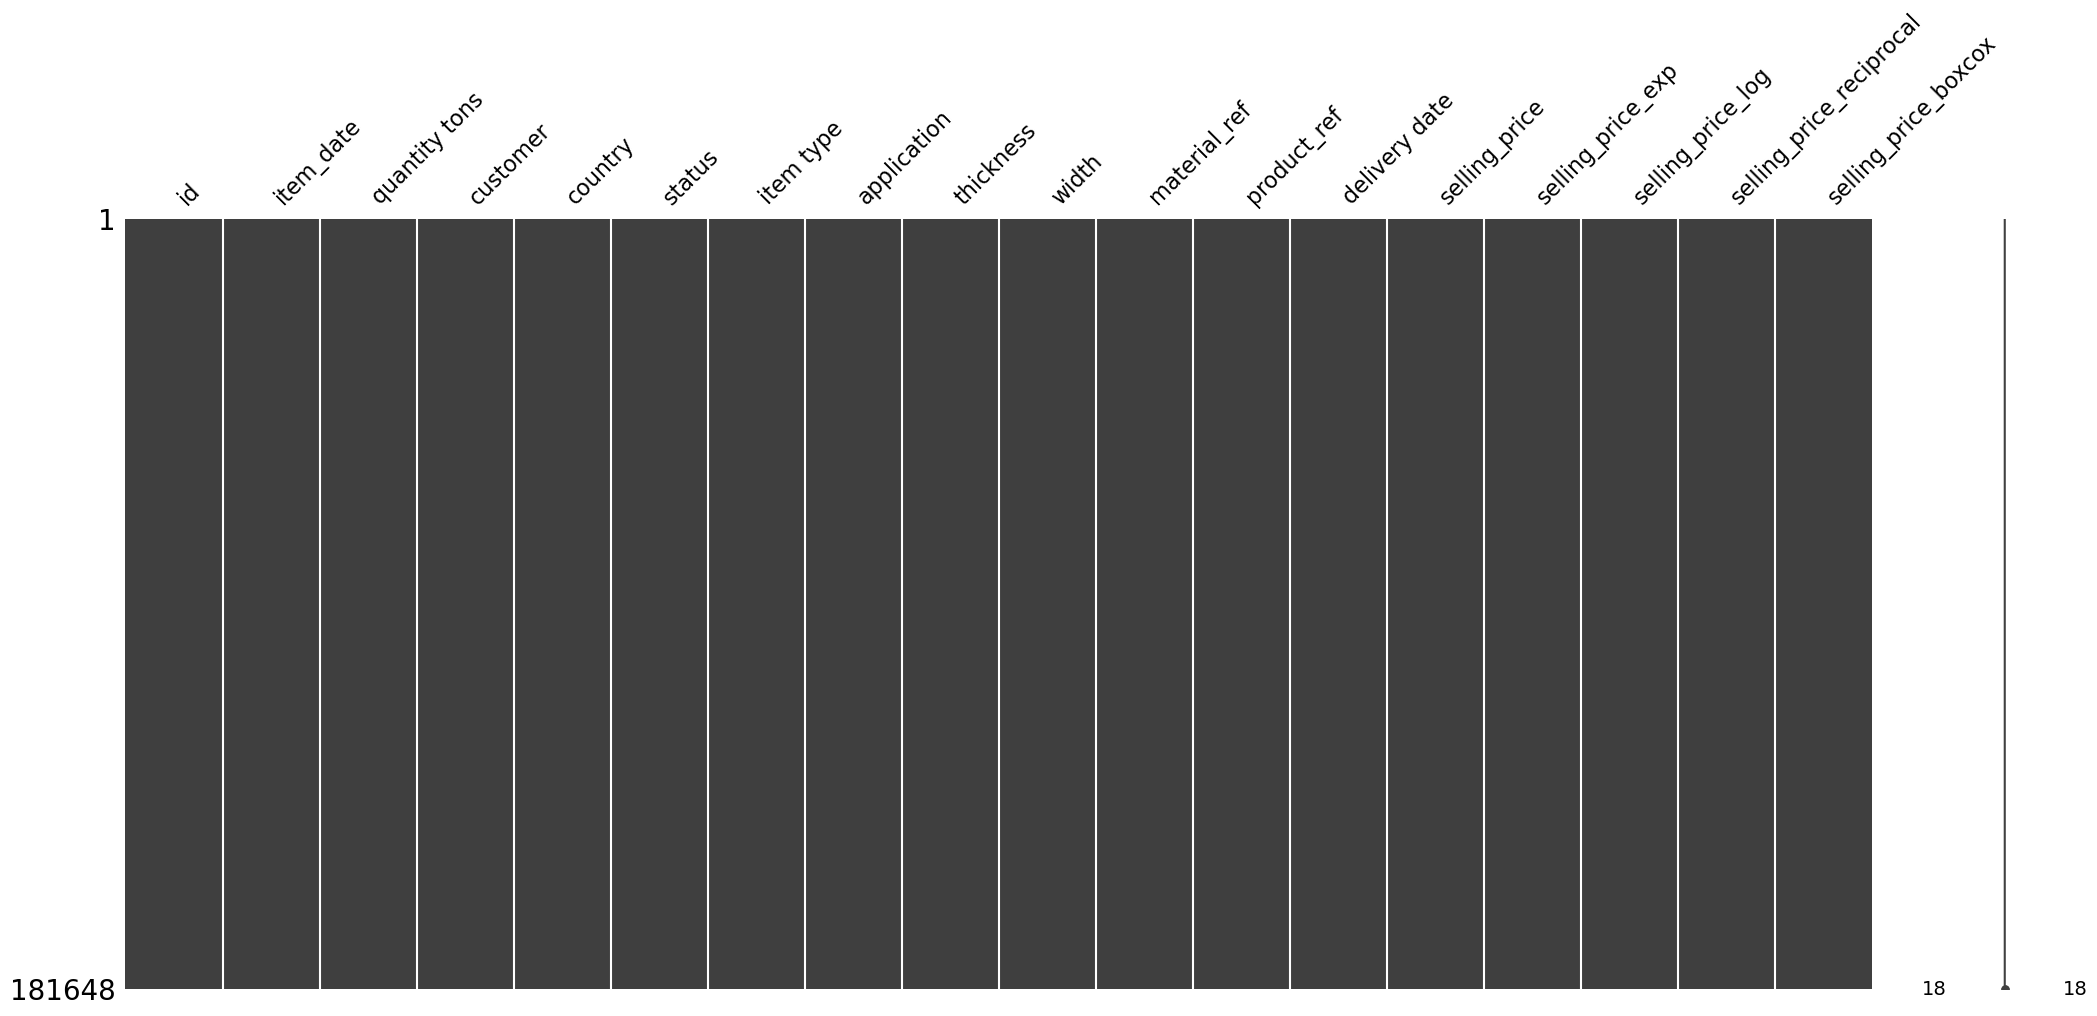

In [92]:
msno.matrix(df_co)

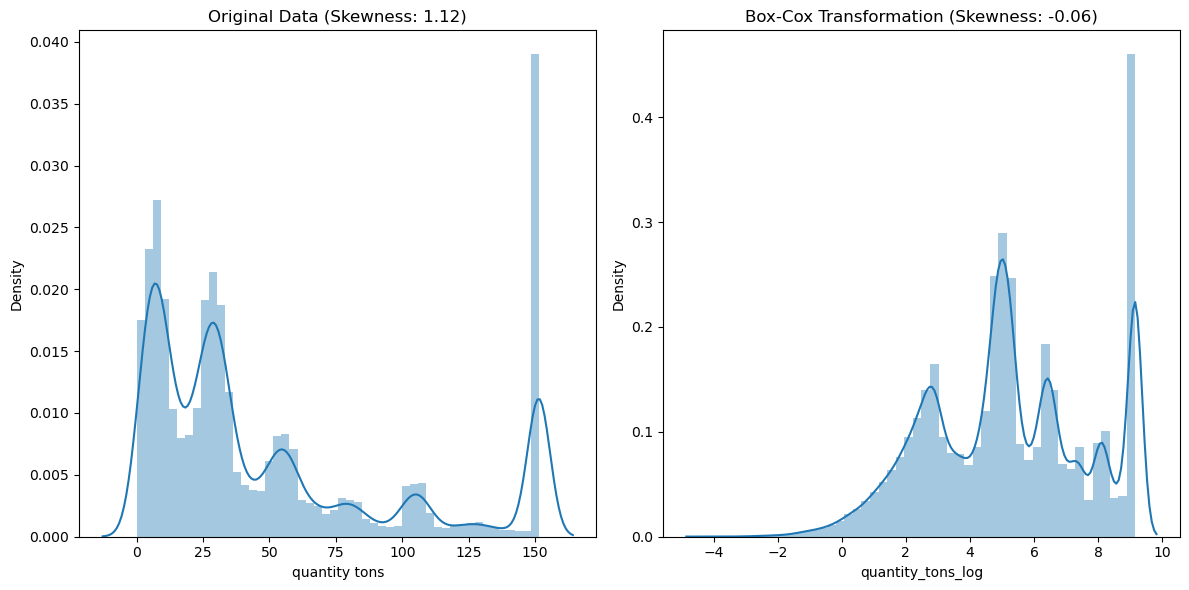

In [98]:
df_co['quantity_tons_log'], boxcox_lambda = boxcox(df_co['quantity tons'])

# Calculate skewness values
skew_log = skew(df_co['quantity tons'])
skew_boxcox = skew(df_co['quantity_tons_log'])

# Plot the transformed columns and skewness values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(df_co['quantity tons'])
plt.title(f'Original Data (Skewness: {skew_log:.2f})')

plt.subplot(1, 2, 2)
sns.distplot(df_co['quantity_tons_log'])
plt.title(f'Box-Cox Transformation (Skewness: {skew_boxcox:.2f})')

plt.tight_layout()
plt.show()

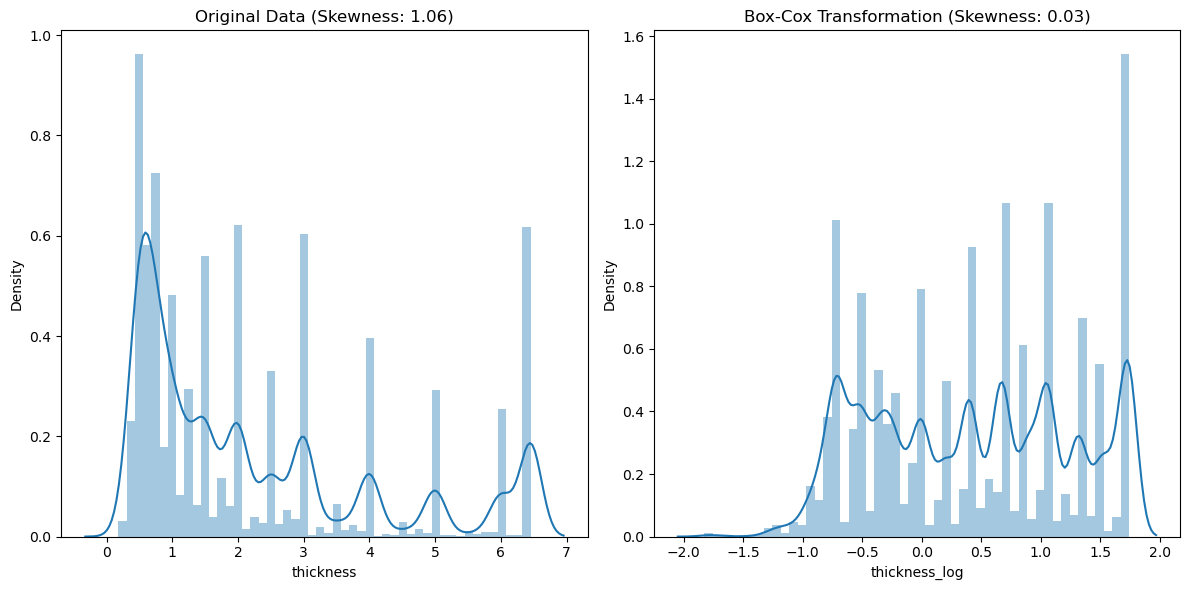

In [99]:
df_co['thickness_log'], boxcox_lambda = boxcox(df_co['thickness'])

# Calculate skewness values
skew_log = skew(df_co['thickness'])
skew_boxcox = skew(df_co['thickness_log'])

# Plot the transformed columns and skewness values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(df_co['thickness'])
plt.title(f'Original Data (Skewness: {skew_log:.2f})')

plt.subplot(1, 2, 2)
sns.distplot(df_co['thickness_log'])
plt.title(f'Box-Cox Transformation (Skewness: {skew_boxcox:.2f})')

plt.tight_layout()
plt.show()

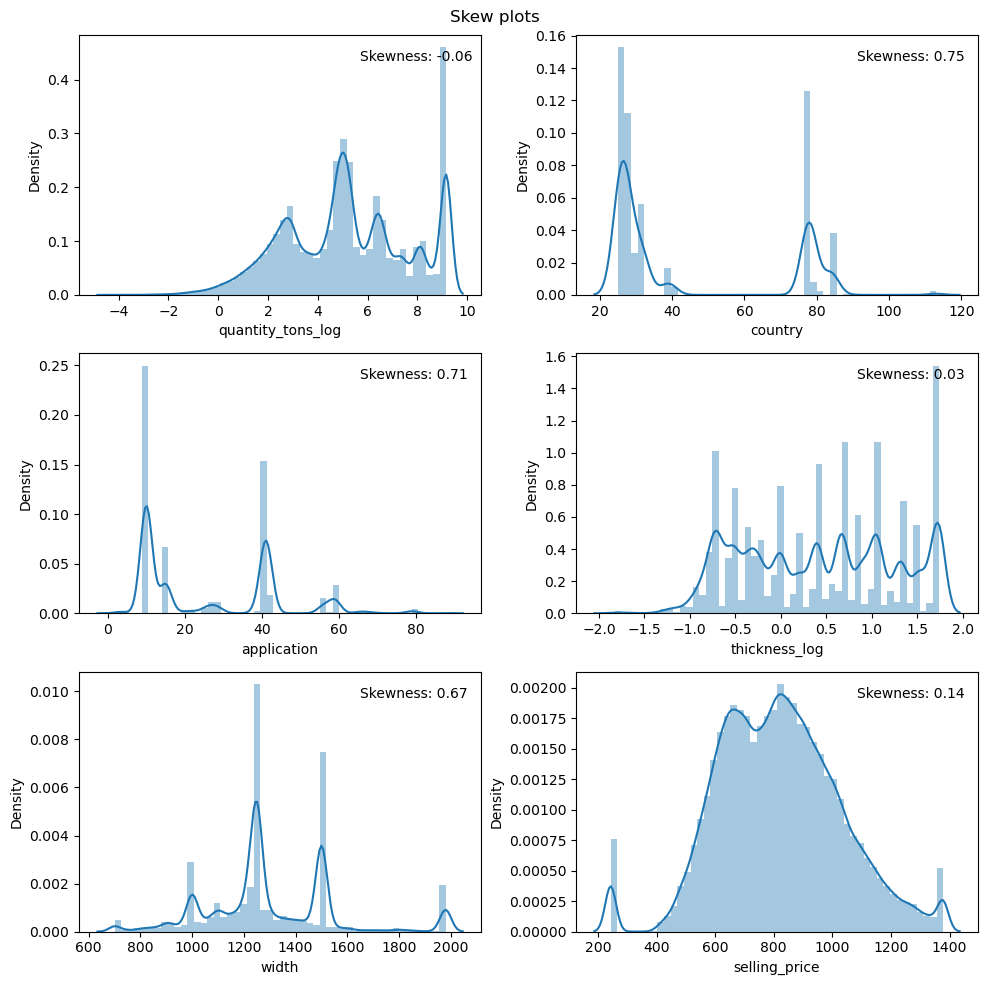

In [102]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(df_co['quantity_tons_log'])
skew_value = np.round(df_co['quantity_tons_log'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,2)
sns.distplot(df_co['country'])
skew_value = np.round(df_co['country'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,3)
sns.distplot(df_co['application'])
skew_value = np.round(df_co['application'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,4)
sns.distplot(df_co['thickness_log'])
skew_value = np.round(df_co['thickness_log'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,5)
sns.distplot(df_co['width'])
skew_value = np.round(df_co['width'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,6)
sns.distplot(df_co['selling_price'])
skew_value = np.round(df_co['selling_price'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.suptitle('Skew plots')
plt.tight_layout()
plt.show()

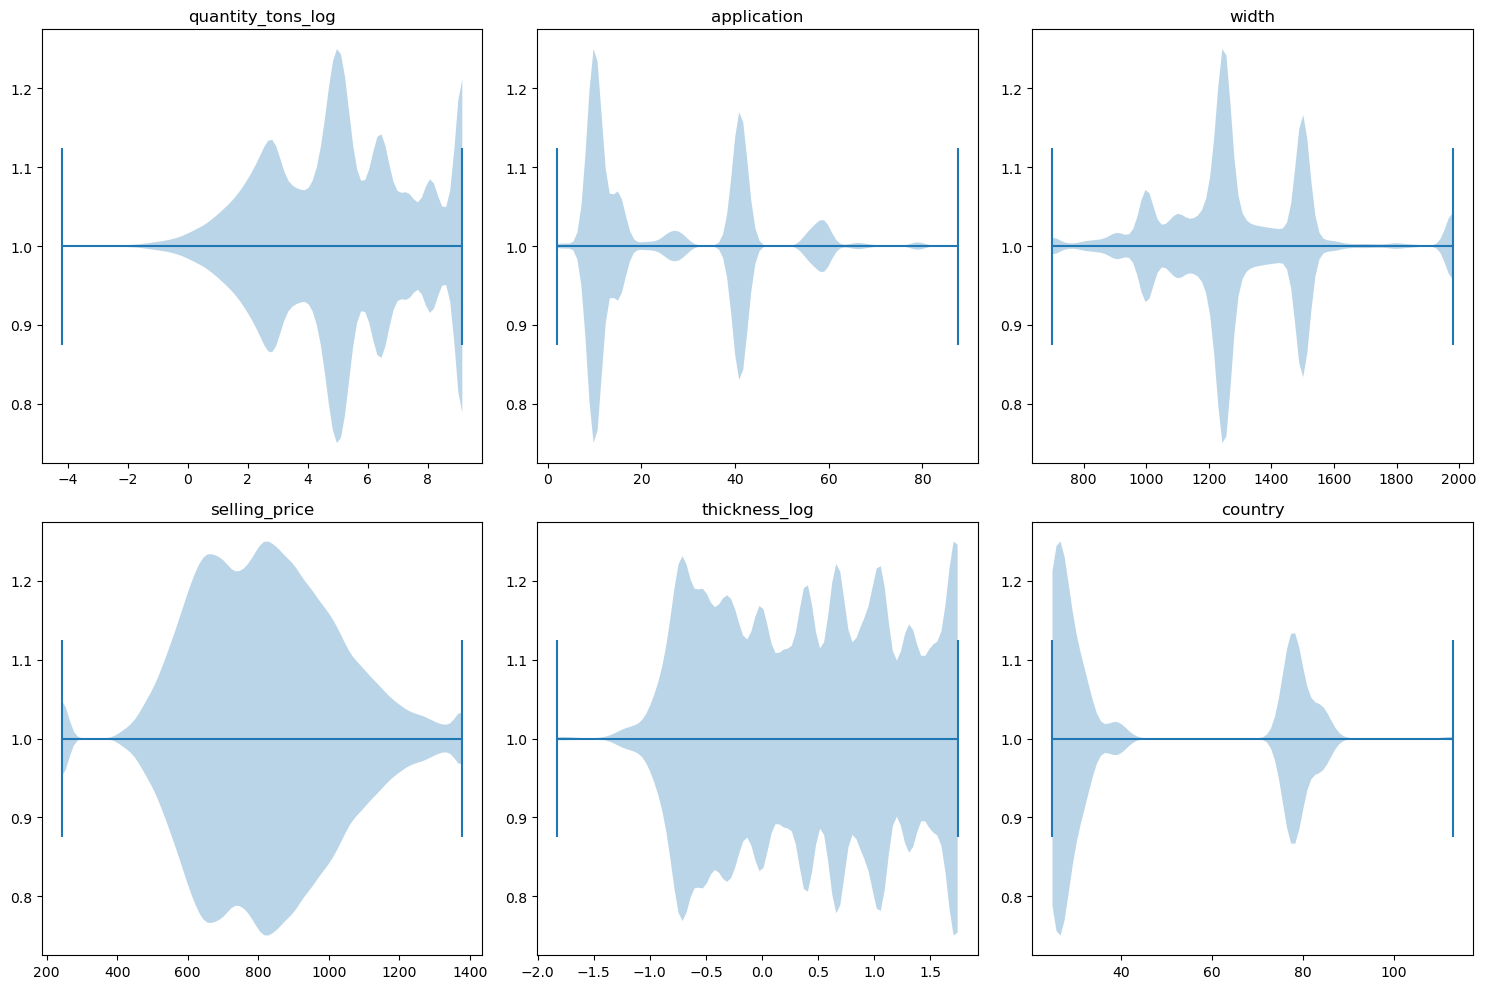

In [105]:
columns_to_plot = ['quantity_tons_log', 'application', 'width', 'selling_price', 'thickness_log', 'country']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].violinplot(df_co[column], vert=False)
    axes[i].set_title(column)  

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [106]:
df_co.shape

(181648, 20)

In [107]:
df_co.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_exp',
       'selling_price_log', 'selling_price_reciprocal', 'selling_price_boxcox',
       'quantity_tons_log', 'thickness_log'],
      dtype='object')

In [108]:
columns_to_drop = ['id', 'item_date', 'quantity tons', 'thickness', 'material_ref', 'delivery date','selling_price_exp',
       'selling_price_log', 'selling_price_reciprocal', 'selling_price_boxcox']
df_co.drop(columns=columns_to_drop, inplace=True)

In [109]:
copper_df = df_co.copy()

In [113]:
copper_df

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,854.00,6.387804,0.676010
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,1047.00,9.160392,-0.224959
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,644.33,9.160392,-1.002348
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,768.00,9.160392,0.808247
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,577.00,9.160392,1.318871
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41.0,1240.0,164141591,602.00,8.147349,-0.040882
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,591.00,8.033196,-0.040882
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,589.00,9.160392,-0.051389
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,619.00,1.698564,-0.346780


#### For Classification

In [126]:
copper_df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [127]:
no_need=['Draft',
 'To be approved',
 'Not lost for AM',
 'Wonderful',
 'Revised',
 'Offered',
 'Offerable']

def unrequired_data(i):
  del_data = copper_df[ (copper_df['status'] == i)].index
  copper_df.drop(del_data , inplace=True)
for i in no_need:
  unrequired_data(i)
print(copper_df['status'].unique())

['Won' 'Lost']


In [128]:
copper_df

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,854.00,6.387804,0.676010
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,1047.00,9.160392,-0.224959
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,644.33,9.160392,-1.002348
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,768.00,9.160392,0.808247
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,577.00,9.160392,1.318871
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41.0,1240.0,164141591,602.00,8.147349,-0.040882
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,591.00,8.033196,-0.040882
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,589.00,9.160392,-0.051389
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,619.00,1.698564,-0.346780


In [129]:
copper_df.status.unique()

array(['Won', 'Lost'], dtype=object)

In [130]:
copper_df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [131]:
enc_status=OrdinalEncoder()
copper_df["status"] = enc_status.fit_transform(copper_df[["status"]])

enc_item_type = OrdinalEncoder()
copper_df["item type"] = enc_item_type.fit_transform(copper_df[["item type"]])

In [132]:
copper_df

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
0,30156308.0,28.0,1.0,5.0,10.0,1500.0,1670798778,854.00,6.387804,0.676010
1,30202938.0,25.0,1.0,5.0,41.0,1210.0,1668701718,1047.00,9.160392,-0.224959
2,30153963.0,30.0,1.0,6.0,28.0,952.0,628377,644.33,9.160392,-1.002348
3,30349574.0,32.0,1.0,3.0,59.0,1317.0,1668701718,768.00,9.160392,0.808247
4,30211560.0,28.0,1.0,5.0,10.0,1980.0,640665,577.00,9.160392,1.318871
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,1.0,5.0,41.0,1240.0,164141591,602.00,8.147349,-0.040882
181668,30200854.0,25.0,1.0,5.0,41.0,1220.0,164141591,591.00,8.033196,-0.040882
181669,30200854.0,25.0,1.0,5.0,41.0,1500.0,164141591,589.00,9.160392,-0.051389
181670,30200854.0,25.0,1.0,5.0,41.0,1250.0,164141591,619.00,1.698564,-0.346780


In [133]:
copper_df.status.value_counts()

1.0    115996
0.0     34435
Name: status, dtype: int64

In [134]:
copper_df["item type"].value_counts()

5.0    91946
3.0    52458
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: item type, dtype: int64

In [136]:
copper_df.describe()

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
count,1.504310e+05,150431.000000,150431.000000,150431.000000,150431.000000,150431.000000,1.504310e+05,150431.000000,150431.000000,150431.000000
mean,3.027511e+07,45.392246,0.771091,4.192347,25.185520,1299.805390,4.748235e+08,823.950560,5.141655,0.435944
std,9.455586e+06,24.488557,0.420132,1.049152,17.606923,252.924433,7.172580e+08,194.761285,2.480466,0.836926
min,1.245800e+04,25.000000,0.000000,0.000000,2.000000,700.000000,6.117280e+05,243.000000,-4.190079,-1.826012
25%,3.019689e+07,26.000000,1.000000,3.000000,10.000000,1176.000000,6.283770e+05,671.000000,3.109519,-0.304417
50%,3.020531e+07,30.000000,1.000000,5.000000,15.000000,1250.000000,6.406650e+05,811.000000,5.052283,0.399560
75%,3.027982e+07,78.000000,1.000000,5.000000,41.000000,1500.000000,1.332077e+09,951.000000,6.830366,1.055978
max,2.147484e+09,113.000000,1.000000,6.000000,87.500000,1980.000000,1.722208e+09,1379.000000,9.160392,1.743546


In [137]:
copper_df.to_csv('copper_pred.csv', index=False)

#### For Regression

In [114]:
copper_rdf = copper_df.copy()
copper_rdf

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,854.00,6.387804,0.676010
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,1047.00,9.160392,-0.224959
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,644.33,9.160392,-1.002348
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,768.00,9.160392,0.808247
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,577.00,9.160392,1.318871
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41.0,1240.0,164141591,602.00,8.147349,-0.040882
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,591.00,8.033196,-0.040882
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,589.00,9.160392,-0.051389
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,619.00,1.698564,-0.346780


In [115]:
copper_rdf.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [116]:
copper_rdf['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [117]:
enc_status=OrdinalEncoder()
copper_rdf["status"] = enc_status.fit_transform(copper_rdf[["status"]])

enc_item_type = OrdinalEncoder()
copper_rdf["item type"] = enc_item_type.fit_transform(copper_rdf[["item type"]])

In [119]:
copper_rdf.head()

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
0,30156308.0,28.0,7.0,5.0,10.0,1500.0,1670798778,854.00,6.387804,0.676010
1,30202938.0,25.0,7.0,5.0,41.0,1210.0,1668701718,1047.00,9.160392,-0.224959
2,30153963.0,30.0,7.0,6.0,28.0,952.0,628377,644.33,9.160392,-1.002348
3,30349574.0,32.0,7.0,3.0,59.0,1317.0,1668701718,768.00,9.160392,0.808247
4,30211560.0,28.0,7.0,5.0,10.0,1980.0,640665,577.00,9.160392,1.318871


In [121]:
copper_rdf.status.value_counts()

7.0    115996
1.0     34435
2.0     19570
5.0      4276
6.0      4168
0.0      3139
4.0        53
3.0        10
8.0         1
Name: status, dtype: int64

In [122]:
copper_rdf["item type"].value_counts()

5.0    105601
3.0     69226
2.0      5659
1.0       610
6.0       524
0.0        27
4.0         1
Name: item type, dtype: int64

In [123]:
copper_rdf.describe()

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
count,1.816480e+05,181648.000000,181648.000000,181648.000000,181648.000000,181648.000000,1.816480e+05,181648.000000,181648.000000,181648.000000
mean,3.051225e+07,44.899113,5.131821,4.133043,25.604361,1297.055179,4.739576e+08,819.078155,5.180466,0.412950
std,2.433542e+07,24.406127,2.644850,1.055230,17.718427,248.970388,7.175087e+08,209.127091,2.485622,0.840803
min,1.245800e+04,25.000000,0.000000,0.000000,2.000000,700.000000,6.117280e+05,243.000000,-4.190079,-1.826012
25%,3.019688e+07,26.000000,2.000000,3.000000,10.000000,1180.000000,6.119930e+05,669.000000,3.151777,-0.361329
50%,3.020524e+07,30.000000,7.000000,5.000000,15.000000,1250.000000,6.406650e+05,812.000000,5.082418,0.399560
75%,3.028042e+07,78.000000,7.000000,5.000000,41.000000,1500.000000,1.332077e+09,953.000000,6.917589,1.055978
max,2.147484e+09,113.000000,8.000000,6.000000,87.500000,1980.000000,1.722208e+09,1379.000000,9.160392,1.743546


In [124]:
copper_rdf.to_csv('copper_rpred.csv', index=False)

### Classification

In [138]:
copper_df = pd.read_csv(r'C:\Users\VENKA\Desktop\Data Science\Python Anaconda\copper_pred.csv')
copper_df

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
0,30156308.0,28.0,1.0,5.0,10.0,1500.0,1670798778,854.00,6.387804,0.676010
1,30202938.0,25.0,1.0,5.0,41.0,1210.0,1668701718,1047.00,9.160392,-0.224959
2,30153963.0,30.0,1.0,6.0,28.0,952.0,628377,644.33,9.160392,-1.002348
3,30349574.0,32.0,1.0,3.0,59.0,1317.0,1668701718,768.00,9.160392,0.808247
4,30211560.0,28.0,1.0,5.0,10.0,1980.0,640665,577.00,9.160392,1.318871
...,...,...,...,...,...,...,...,...,...,...
150426,30200854.0,25.0,1.0,5.0,41.0,1240.0,164141591,602.00,8.147349,-0.040882
150427,30200854.0,25.0,1.0,5.0,41.0,1220.0,164141591,591.00,8.033196,-0.040882
150428,30200854.0,25.0,1.0,5.0,41.0,1500.0,164141591,589.00,9.160392,-0.051389
150429,30200854.0,25.0,1.0,5.0,41.0,1250.0,164141591,619.00,1.698564,-0.346780


#### Logistic Regression - classification

In [140]:
X = copper_df.drop('status', axis=1)
y = copper_df['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy :  0.756772027786087
Precision score :  0.7748131591813927
F1 score :  0.8584252273166958
Recall :  0.9622657876474671
Confusion Matrix:
[[  583  6448]
 [  870 22186]]
ROC AUC Score for Model 1: 0.7241444272864762
#=========#=========#
              precision    recall  f1-score   support

         0.0       0.40      0.08      0.14      7031
         1.0       0.77      0.96      0.86     23056

    accuracy                           0.76     30087
   macro avg       0.59      0.52      0.50     30087
weighted avg       0.69      0.76      0.69     30087



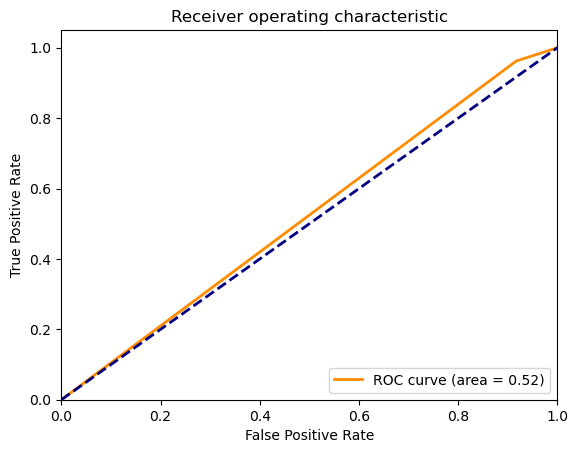

In [141]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
X_test_pred_1 = model_1.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, X_test_pred_1))
print("Precision score : ", precision_score(y_test, X_test_pred_1))
print("F1 score : ", f1_score(y_test, X_test_pred_1))
print("Recall : ", recall_score(y_test, X_test_pred_1))
cm = confusion_matrix(y_test, X_test_pred_1)
print(f"Confusion Matrix:\n{cm}")

y_prob_1 = model_1.predict_proba(X_test)[:, 1]
roc_score_1 = roc_auc_score(y_test, y_prob_1)
print('ROC AUC Score for Model 1:', roc_score_1)

print('#=========#=========#')

print(classification_report(y_test, X_test_pred_1))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, X_test_pred_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Extra Trees Classifier

Accuracy :  0.9295376740785056
Precision score :  0.9486926703814831
F1 score :  0.9542965549950415
Recall :  0.9599670367800138
Confusion Matrix:
[[ 5834  1197]
 [  923 22133]]
ROC AUC Score for Model 2: 0.9723045037437555
#=========#=========#
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      7031
         1.0       0.95      0.96      0.95     23056

    accuracy                           0.93     30087
   macro avg       0.91      0.89      0.90     30087
weighted avg       0.93      0.93      0.93     30087



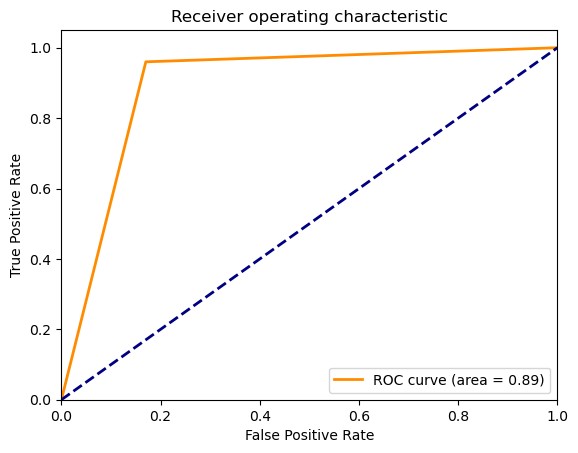

In [142]:
model_2 = ExtraTreesClassifier()
model_2.fit(X_train, y_train)
X_test_pred_2 = model_2.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, X_test_pred_2))
print("Precision score : ", precision_score(y_test, X_test_pred_2))
print("F1 score : ", f1_score(y_test, X_test_pred_2))
print("Recall : ", recall_score(y_test, X_test_pred_2))
cm = confusion_matrix(y_test, X_test_pred_2)
print(f"Confusion Matrix:\n{cm}")

y_prob_2 = model_2.predict_proba(X_test)[:, 1]
roc_score_2 = roc_auc_score(y_test, y_prob_2)
print('ROC AUC Score for Model 2:', roc_score_2)

print('#=========#=========#')

print(classification_report(y_test, X_test_pred_2))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, X_test_pred_2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Classifier

Accuracy :  0.9342905573835876
Precision score :  0.9498100806623704
F1 score :  0.9574719814141588
Recall :  0.9652585010409438
Confusion Matrix:
[[ 5855  1176]
 [  801 22255]]
ROC AUC Score for Model 3: 0.9785296553006902
#=========#=========#
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      7031
         1.0       0.95      0.97      0.96     23056

    accuracy                           0.93     30087
   macro avg       0.91      0.90      0.91     30087
weighted avg       0.93      0.93      0.93     30087



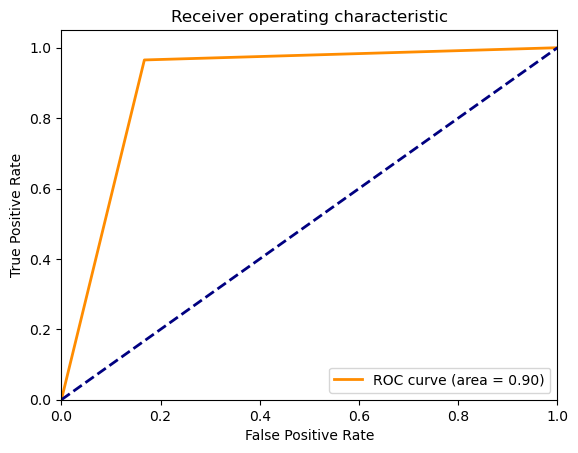

In [143]:
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)
X_test_pred_3 = model_3.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, X_test_pred_3))
print("Precision score : ", precision_score(y_test, X_test_pred_3))
print("F1 score : ", f1_score(y_test, X_test_pred_3))
print("Recall : ", recall_score(y_test, X_test_pred_3))
cm = confusion_matrix(y_test, X_test_pred_3)
print(f"Confusion Matrix:\n{cm}")

y_prob_3 = model_3.predict_proba(X_test)[:, 1]
roc_score_3 = roc_auc_score(y_test, y_prob_3)
print('ROC AUC Score for Model 3:', roc_score_3)

print('#=========#=========#')

print(classification_report(y_test, X_test_pred_3))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, X_test_pred_3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Extreme Gradient Boosting Classifier

Accuracy :  0.899890318077575
Precision score :  0.9172008991757555
F1 score :  0.9360210714133991
Recall :  0.9556297709923665
Confusion Matrix:
[[ 5042  1989]
 [ 1023 22033]]
ROC AUC Score for Model 4: 0.9541843467874154
#=========#=========#
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77      7031
         1.0       0.92      0.96      0.94     23056

    accuracy                           0.90     30087
   macro avg       0.87      0.84      0.85     30087
weighted avg       0.90      0.90      0.90     30087



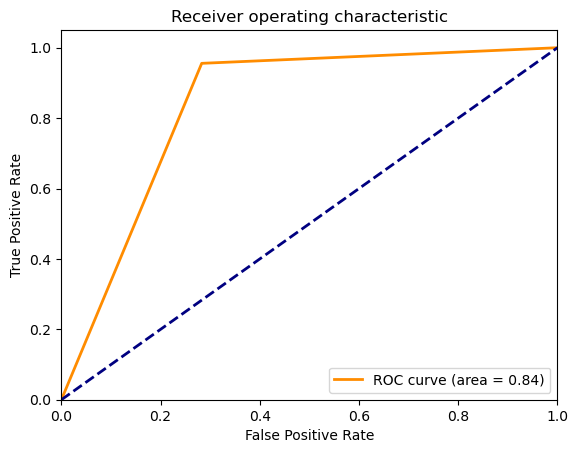

In [144]:
model_4 = XGBClassifier()
model_4.fit(X_train, y_train)
X_test_pred_4 = model_4.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, X_test_pred_4))
print("Precision score : ", precision_score(y_test, X_test_pred_4))
print("F1 score : ", f1_score(y_test, X_test_pred_4))
print("Recall : ", recall_score(y_test, X_test_pred_4))
cm = confusion_matrix(y_test, X_test_pred_4)
print(f"Confusion Matrix:\n{cm}")

y_prob_4 = model_4.predict_proba(X_test)[:, 1]
roc_score_4 = roc_auc_score(y_test, y_prob_4)
print('ROC AUC Score for Model 4:', roc_score_4)

print('#=========#=========#')

print(classification_report(y_test, X_test_pred_4))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, X_test_pred_4)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Decision-Tree Classifier

Accuracy :  0.9154119719480174
Precision score :  0.9447118511773124
F1 score :  0.9448142767309234
Recall :  0.9449167244968771
Confusion Matrix:
[[ 5756  1275]
 [ 1270 21786]]
ROC AUC Score for Model 5: 0.8819188488256281
#=========#=========#
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      7031
         1.0       0.94      0.94      0.94     23056

    accuracy                           0.92     30087
   macro avg       0.88      0.88      0.88     30087
weighted avg       0.92      0.92      0.92     30087



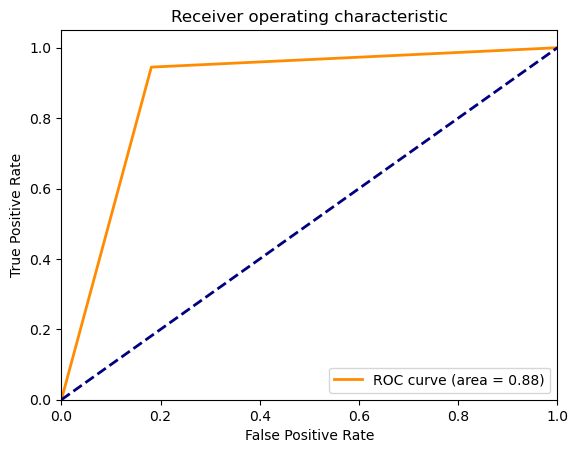

In [145]:
model_5 = DecisionTreeClassifier()
model_5.fit(X_train, y_train)
X_test_pred_5 = model_5.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, X_test_pred_5))
print("Precision score : ", precision_score(y_test, X_test_pred_5))
print("F1 score : ", f1_score(y_test, X_test_pred_5))
print("Recall : ", recall_score(y_test, X_test_pred_5))
cm = confusion_matrix(y_test, X_test_pred_5)
print(f"Confusion Matrix:\n{cm}")

y_prob_5 = model_5.predict_proba(X_test)[:, 1]
roc_score_5 = roc_auc_score(y_test, y_prob_5)
print('ROC AUC Score for Model 5:', roc_score_5)

print('#=========#=========#')

print(classification_report(y_test, X_test_pred_5))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, X_test_pred_5)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Best Model for Classification

In [146]:
print("Logistic Reg Acc:", 0.756772027786087)
print("Extra trees Acc:", 0.9295376740785056)
print("Random forest:", 0.9342905573835876)
print("XGB Acc:", 0.899890318077575)
print("Decision Tree Acc:", 0.9154119719480174)

Logistic Reg Acc: 0.756772027786087
Extra trees Acc: 0.9295376740785056
Random forest: 0.9342905573835876
XGB Acc: 0.899890318077575
Decision Tree Acc: 0.9154119719480174


In [147]:
accuracies = {
    "Logistic Reg": 0.756772027786087,
    "Extra trees":  0.9295376740785056,
    "Random forest": 0.9342905573835876,
    "XGB": 0.8998903180775756,
    "Decision Tree Acc": 0.9154119719480174
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print("Best Accuracy Model:", best_model)
print("Best Accuracy:", best_accuracy)
print("Explanation: The", best_model, "model achieved the highest accuracy of", best_accuracy)

Best Accuracy Model: Random forest
Best Accuracy: 0.9342905573835876
Explanation: The Random forest model achieved the highest accuracy of 0.9342905573835876


#### Predict with new sample

In [150]:
new_sample = np.array([[45208308.0, 22.0, 3.0, 2.0, 7.0, 1300.0, 1625785778, 5.406042, 8.067542, 0.893147]])

ohe = OneHotEncoder(sparse=False)

new_sample_ohe = ohe.fit_transform(new_sample[:, [8]])

new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)

scaler = StandardScaler()

new_sample_scaled = scaler.fit_transform(new_sample)

new_pred = model_3.predict(new_sample_scaled)

if new_pred == 1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


#### Save the model

In [152]:
with open('model_3.pkl', 'wb') as file:
    pickle.dump(model_3, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('enc.pkl', 'wb') as f:
    pickle.dump(ohe, f)

### Regression

In [153]:
copper_rdf = pd.read_csv(r'C:\Users\VENKA\Desktop\Data Science\Python Anaconda\copper_rpred.csv')
copper_rdf

,customer,country,status,item type,application,width,product_ref,selling_price,quantity_tons_log,thickness_log
0,30156308.0,28.0,7.0,5.0,10.0,1500.0,1670798778,854.00,6.387804,0.676010
1,30202938.0,25.0,7.0,5.0,41.0,1210.0,1668701718,1047.00,9.160392,-0.224959
2,30153963.0,30.0,7.0,6.0,28.0,952.0,628377,644.33,9.160392,-1.002348
3,30349574.0,32.0,7.0,3.0,59.0,1317.0,1668701718,768.00,9.160392,0.808247
4,30211560.0,28.0,7.0,5.0,10.0,1980.0,640665,577.00,9.160392,1.318871
...,...,...,...,...,...,...,...,...,...,...
181643,30200854.0,25.0,7.0,5.0,41.0,1240.0,164141591,602.00,8.147349,-0.040882
181644,30200854.0,25.0,7.0,5.0,41.0,1220.0,164141591,591.00,8.033196,-0.040882
181645,30200854.0,25.0,7.0,5.0,41.0,1500.0,164141591,589.00,9.160392,-0.051389
181646,30200854.0,25.0,7.0,5.0,41.0,1250.0,164141591,619.00,1.698564,-0.346780


#### Decision-Tree Regressor

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have X and y defined as follows:
X = copper_rdf.drop('selling_price', axis=1)
y = copper_rdf['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 15176.652555354522
R-squared: 0.6520489295644121


#### Random Forest Regressor

In [155]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = copper_rdf.drop('selling_price', axis=1)
y = copper_rdf['selling_price']

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(10, 101, 10),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_regressor, param_distributions, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate R-squared and MSE
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print('Best Hyperparameters:', best_params)
print('R-squared:', r_squared)
print('Mean Squared Error:', mse)

Best Hyperparameters: {'n_estimators': 90, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 60}
R-squared: 0.7219188989967769
Mean Squared Error: 12225.400664582932


#### Predict with new sample

In [159]:
import numpy as np
ohe = OneHotEncoder(handle_unknown='ignore')
# New sample data
new_sample = np.array([[30156210, 28, 'Won', 'W', 10, 1500, 1670798778, 4.056742, 0.693147]])

encoded_category = np.array([1 if category == 'W' else 0 for category in new_sample[:, 3]])
encoded_outcome = np.array([1 if outcome == 'Won' else 0 for outcome in new_sample[:, 2]])

new_sample_encoded = np.column_stack((new_sample[:, :2], encoded_category, encoded_outcome, new_sample[:, 4:]))

new_sample_scaled = scaler.transform(new_sample_encoded)

print('Encoded and Scaled New Sample:')
print(new_sample_scaled)
predicted_price = best_rf_model.predict(new_sample_scaled)

print('Predicted Selling Price:', predicted_price)

Encoded and Scaled New Sample:
[[-0.01463042 -0.69241462 -1.56221816 -2.9690704  -0.88068788  0.81513862
   1.66805577 -0.45209079  0.33325096]]
Predicted Selling Price: [632.26063486]


#### Save the model

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

#### Extreme Gradient Boost

In [156]:
import xgboost as xgb
X = copper_rdf.drop('selling_price', axis=1)
y = copper_rdf['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(random_state=42)

# Hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = xgb.XGBRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print('Best Hyperparameters:', best_params)
print('R-squared:', r2)
print('Mean Squared Error:', mse)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
R-squared: 0.7042106716527309
Mean Squared Error: 13003.915182683812


#### Best Model for Regression

In [161]:
print("Random-forest R²:", 0.7219188989967769)
print("XGB R²:", 0.7042106716527309)
print("Decision-Tree R²:", 0.6520489295644121)

Random-forest R²: 0.7219188989967769
XGB R²: 0.7042106716527309
Decision-Tree R²: 0.6520489295644121


In [163]:
r_squared = {
    "Random-forest R²": 0.7219188989967769,
    "XGB R²": 0.7042106716527309,
    "Decision-Tree R²": 0.6520489295644121,
}

best_model = max(r_squared, key=r_squared.get)
best_accuracy = r_squared[best_model]

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)
print("Explanation: The", best_model, "model achieved the highest R²_value of", best_accuracy)

Best Model: Random-forest R²
Best Accuracy: 0.7219188989967769
Explanation: The Random-forest R² model achieved the highest R²_value of 0.7219188989967769
